In [1]:
#%%
import matplotlib.pyplot as plt
import sys
import numpy as np



In [2]:
sys.path.insert(1, r"C:\Users\Benja\Code\Python\Finanzen\Haushaltsbuch\src")

from data_structure import *


In [3]:
# %%
Categories = Category.Categories
SpecificMonths = SpecificMonth.SpecificMonths






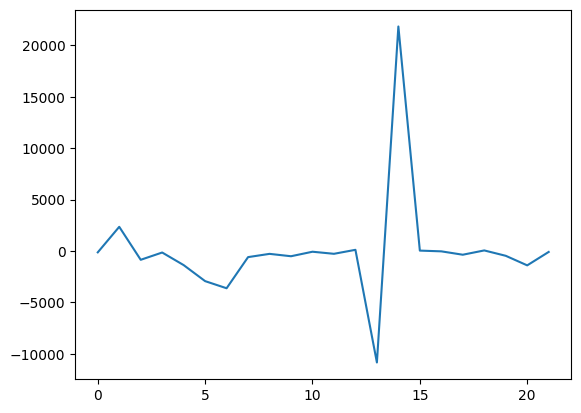

In [4]:
y = []
for member in Categories.members:
    y_temp = 0
    for trns in member.members:
        y_temp += trns.value
    y.append(y_temp)

fig, ax = plt.subplots()
# x = np.linspace(0, len(Categories.members), )
ax.plot( y)

Betrachtung der monatlichen Start und Endwerte

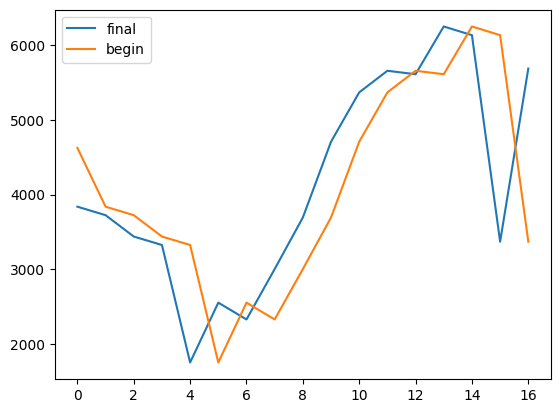

In [5]:
fig2, ax2 = plt.subplots()
monthly_money_final = [member.final_balance for member in SpecificMonths.members]
monthly_money_begin = [member.start_balance for member in SpecificMonths.members]
ax2.plot(monthly_money_final, label="final")
ax2.plot(monthly_money_begin, label="begin")
ax2.legend()


==> Wie erwartet ist balance begin und final nur verschoben, aber sonst gleich.

Im nächsten Schritt will ich einen Fit ab Mai 2022 machen, um zu sehen, wie sich mein Kontostand, als linear genähert, geändert hat, seit dem ich arbeite. ( Ob das sinn macht ist fraglich.)

In [6]:
def linear(a, b, x):
    return a*x+b

average monthly plus all:  174.60
average monthly plus since working:  297.23


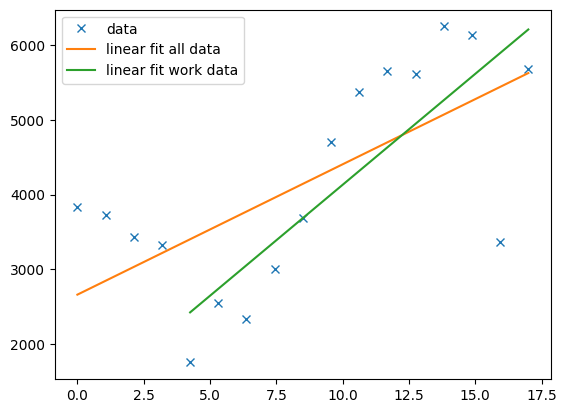

In [7]:
# %% linearer fit
fig3, ax3 = plt.subplots()
x = np.linspace(0, len(SpecificMonths.members), len(monthly_money_final))

# raw data
ax3.plot(x, monthly_money_final, linestyle="", marker='x', label="data")

# linear fit of all data
result = np.polyfit(x=x, y=monthly_money_final, deg=1)
ax3.plot(x, [linear(result[0], result[1], x_i) for x_i in x], label="linear fit all data")

# linear fit of data, when I start working
result_work = np.polyfit(x=x[4:], y=monthly_money_final[4:], deg=1)
ax3.plot(x[4:], [linear(result_work[0], result_work[1], x_i) for x_i in x[4:]], label="linear fit work data")

ax3.legend()

print("average monthly plus all: ", f"{result[0]:.2f}")
print("average monthly plus since working: ", f"{result_work[0]:.2f}")

Das scheint mir irgendwie zuviel zu sein, aber wüsste nicht, was der Fehler sein könnte. Daher Werte ich das Ergebnis als war, aber behalte es im Auge.

Jetz will ich grob abschätzen, wie viel Geld wir beide auf unser gemeinsames Konto überweisen sollten (ich nehme die Durchschnitts Werte ab Mai letzen Jahres).
Dazu will addieren:
- die Warmmiete
- Einkaufsausgaben (skaliert)
- sonstige relevante Ausgaben in der Kategorie Wohnung
- Essen gehen
- Urlaub
- Tanken
- Hausratsversicherung, Haftpflicht, KFZ-Versicherung? 

In [8]:
warmmiete = 1370

# Lebensmittel
Lebensmittel = None
for member in Categories.members:
    if member.name == "Lebensmittel":
        Lebensmittel = member

totalsw = 0  # total since work
for member in Lebensmittel.members:
    if member.year == 2023:
        totalsw += member.value
    elif member.year == 2022:
        if member.month >= 5:
            totalsw += member.value

totalsw_pm = round(abs(totalsw/10), 2) # total since work per month
totalsw_pm_sk = totalsw_pm * 14/9 * 1.1  # assumption I buy groceries for 9 oout of 14 days and the 1.1 to account for a to hihgh assumption

# sonsitge Wohnung
internet = 29.99
strom = 59

# Essen gehen

In [9]:
for member in Categories.members:
    if member.name == "Wohnung":
        wohnung = member

for member in wohnung.members:
    print(member.name)
    print(member.value)

# only Strom and Internet are relevant

Kostenausgleich mit Julian Uhle
-16.57
Kaution + 1. Monatsmiete
-1590.0
übernommene Miete
-465.0
Strom
-59.0
Miete
-465.0
Strom
-59.0
Miete
-465.0
Strom
-59.0
Miete
-465.0
Strom
-59.0
Miete
-465.0
Strom
-59.0
Internet
-1.56
Miete
-465.0
Strom
-59.0
Internet
-12.66
Miete
-465.0
Strom
-59.0
Internet
-29.99
Miete
-465.0
Strom
-59.0
Internet
-29.99
Miete
-465.0
Strom
-59.0
Internet
-29.99
Cashback
180.0
Miete
-465.0
Internet
-29.99
Strom
-56.0
Miete
-465.0
Strom
-58.0
Kaution
-1725.0
Internet
-29.99
Miete
-342.5
Lebenskosten
-1000.0
Umzug
-325.0
Strom
464.61
Lebenskosten
-500.0
Internet
-69.98


In [10]:
for member in Categories.members:
    if member.name == "Urlaub":
        urlaub = member

total_urlaub = 0

for member in urlaub.members:
    total_urlaub += member.value

total_urlaub_pm = round(abs(total_urlaub/14), 2)
print(total_urlaub_pm)

26.11


In [11]:
for member in Categories.members:
    if member.name == "Essengehen":
        eg = member

total_eg = 0

for member in eg.members:
    total_eg += member.value

total_eg_pm = round(abs(total_eg/14), 2)
print(total_eg_pm)

42.72


In [12]:
tanken = 0  # wie sollen wir das abschätzen? einfach einen Wert drauf?
hausrat = 0  # carina fragen
haftpflicht = round(45.79712/12)
kfz_versucherung = round(337.51/6)  # halbjährlich muss ich das bezahlen, wenn eine Zweite person dazukommt, muss ich dann mehr bezahlen?

In [13]:
total = 0
total += warmmiete
total += totalsw_pm
total += internet
total += strom  # das wird mehr werden
total += total_urlaub_pm *2
total += total_eg_pm *2
total += tanken
total += hausrat
total += haftpflicht
total += kfz_versucherung

total *= 1.1  # better to much than to less 
print(f"Total for both = {total:.2f}")
print(f"That means total for only one person = {total/2:.2f}")

Total for both = 2074.37
That means total for only one person = 1037.18
